In [13]:
from data_prep import *
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import tree
import graphviz
import os
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [14]:
df = pd.read_csv('data.csv')
data = DataPrep(df)
data.formart_date()
data.nan_values()
data.new_features()
data = data.get_prediction_and_training_data()

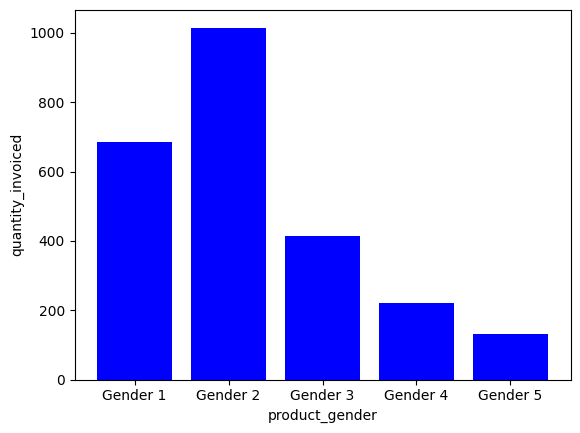

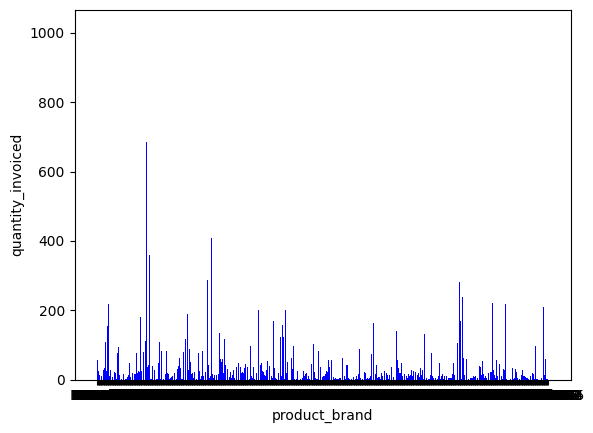

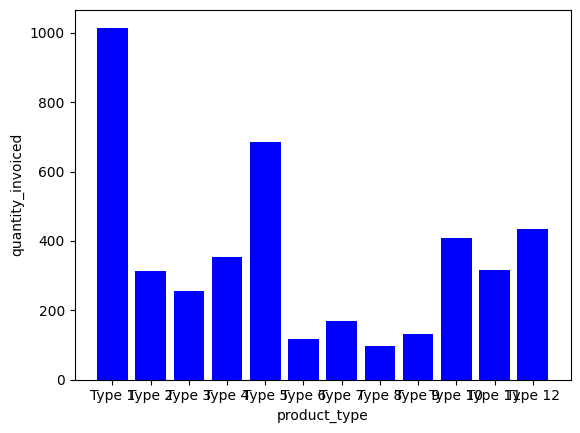

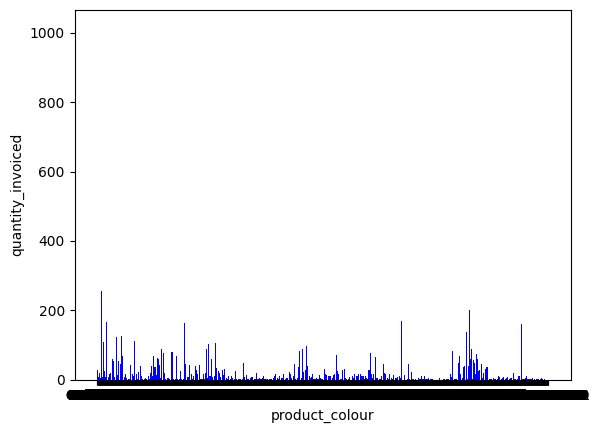

In [11]:
ml_data = data[0]
data_explore =  DataExploration(ml_data)
columns = ['product_gender','product_brand', 'product_type','product_colour']
for i in columns:
    data_explore.histograms(i)

<AxesSubplot: >

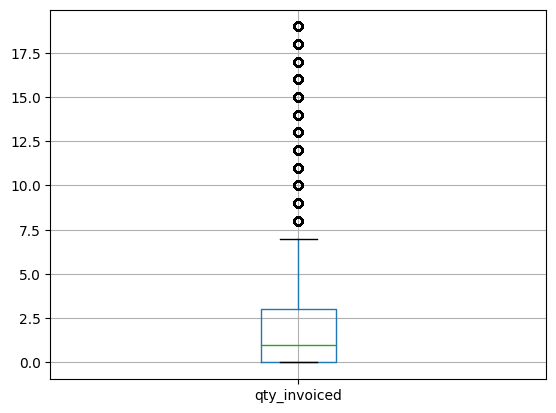

In [4]:
ml_data = ml_data[ml_data['qty_invoiced'] < 100]
ml_data.describe
ml_data.boxplot(column='qty_invoiced')

In [5]:
DataPrep.categorical_encoding(ml_data)
ml_data = ml_data.fillna(0)
data_explore.correlation()['qty_invoiced']

C:\Users\shami\PycharmProjects\runway\data_prep.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = le.fit_transform(dataset[i])
C:\Users\shami\PycharmProjects\runway\data_prep.py:54: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = self.data.corr()


special_event                             0.058367
days_since_brand_appeared                 0.003217
days_since_brand_type_appeared            0.008392
days_since_product_appeared              -0.000154
brand_appearances_in_past_30_days        -0.006463
brand_appearances_in_past_60_days        -0.000005
brand_appearances_in_past_90_days         0.005149
brand_type_appearances_in_past_30_days   -0.018039
brand_type_appearances_in_past_60_days   -0.005559
brand_type_appearances_in_past_90_days   -0.000136
product_appearances_in_past_30_days      -0.048622
product_appearances_in_past_60_days      -0.052646
product_appearances_in_past_90_days      -0.051085
brand_popularity_in_past_30_days          0.015376
rrsp                                     -0.146191
selling_price                            -0.162113
qty_available                             0.371304
qty_invoiced                              1.000000
event_duration                           -0.001536
year                           

In [6]:
y = ml_data['qty_invoiced']
X = ml_data[['event_duration', 'qty_available', 'selling_price', 'rrsp', 'brand_popularity_in_past_30_days', 'days_since_brand_appeared', 'days_since_brand_type_appeared', 'days_since_brand_type_appeared',
             'product_gender','product_type', 'year', 'month', 'special_event', 'brand_type_appearances_in_past_30_days',
             'product_appearances_in_past_30_days', 'product_appearances_in_past_90_days', 'product_appearances_in_past_60_days']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
# tree prunning
mse=[]
mae=[]
for i in range(1,20):
    rt2 = DecisionTreeRegressor(random_state=100, criterion="mae", max_depth=i)
    model_2 = rt2.fit(X_train, y_train)
    # Perform 10-fold cross validation
    # cv_scores = cross_val_score(model_2, X_train, y_train, cv = 5, scoring='r2')
    # print("mean cross validation score:",format(np.mean(cv_scores)))

    #Predict the response for test dataset
    y_pred2 = model_2.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred2))
    mae.append(mean_absolute_error(y_test, y_pred2))
print(mse)
print(mae)

C:\Users\shami\PycharmProjects\runway\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\shami\PycharmProjects\runway\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\shami\PycharmProjects\runway\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\shami\PycharmProjects\runway\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\sha

[15.870943454506843, 13.474217648989363, 12.47230641518176, 12.372381706210545, 11.48356145871542, 11.170828587424468, 10.535956292592521, 10.304648738392633, 9.842178420432827, 9.583664742562597, 9.235405123651036, 8.982089422575726, 8.825334465916331, 8.648019266781212, 8.63418212706809, 8.491100214289851, 8.61937006505917, 8.909201915094886, 8.8490414872874]
[2.160215448174675, 2.094499893820344, 2.015077511148864, 1.9245352226876966, 1.8363868028340316, 1.7825730226452248, 1.7355547404390046, 1.683024768817931, 1.6436803799301145, 1.6074731172416457, 1.565715554354331, 1.5267765786984304, 1.5007432575918453, 1.4857333153149674, 1.4711673970539971, 1.4510704839861774, 1.4493619567945326, 1.4646904380393444, 1.4573447363848724]
